In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import Input, Dense, Concatenate
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

##Load data
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
##Input image dimensions

img_rows, img_cols = 28, 28
input_shape = (img_rows * img_cols, )

In [3]:
## The data, split into training and test sets, and resized

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], np.prod(X_train.shape[1:]))
X_test = X_test.reshape(X_test.shape[0], np.prod(X_test.shape[1:]))

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
noise_factor = 0.5

X_train_noisy = X_train + noise_factor * np.random.normal(loc = 0.0, scale = 1.0,
                                                          size = X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc = 0.0, scale = 1.0,
                                                        size = X_test.shape)

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)


X_feat_train = np.concatenate((X_train, X_test), axis = 0)
X_feat_train_noisy = np.concatenate((X_train_noisy, X_test_noisy), axis =0)


print(X_feat_train_noisy.shape[0], ' DAE train samples')

70000  DAE train samples


In [0]:
def DEEP_DAE(features_shape, act = 'relu'):
  
  ##Input
  x = Input(name = 'inputs', shape = features_shape, 
            dtype = 'float32')
  o = x
  
  
  ##Encoder / Decoder
  o = Dense(1024, activation = act, name = 'dense1')(o)
  o = Dense(1024, activation = act, name = 'dense2')(o)
  o = Dense(1024, activation = act, name = 'dense3')(o)
  dec = Dense(784, activation = 'sigmoid', name = 'dense_dec')(o)
  
  
  ## Print network summary
  Model(inputs = x, outputs = dec).summary()
  
  return Model(inputs = x, outputs = dec)

In [6]:
batch_size = 128
epochs = 40

autoencoder = DEEP_DAE(input_shape)
autoencoder.compile(optimizer = 'adadelta',
                    loss = 'binary_crossentropy')

autoencoder.fit(X_feat_train_noisy, X_feat_train,
                epochs = epochs,
                batch_size = batch_size,
                shuffle = True)

decoded_imgs = autoencoder.predict(X_feat_train_noisy)

W0903 15:57:13.913218 140529824221056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0903 15:57:13.966767 140529824221056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0903 15:57:14.031396 140529824221056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0903 15:57:14.039062 140529824221056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0903 15:57:14.060262 140529824221056 deprecation_wrappe

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 1024)              803840    
_________________________________________________________________
dense2 (Dense)               (None, 1024)              1049600   
_________________________________________________________________
dense3 (Dense)               (None, 1024)              1049600   
_________________________________________________________________
dense_dec (Dense)            (None, 784)               803600    
Total params: 3,706,640
Trainable params: 3,706,640
Non-trainable params: 0
_________________________________________________________________


W0903 15:57:14.516355 140529824221056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/40
70000/70000 [==============================] - 12s 173us/step - loss: 0.2512
Epoch 2/40
70000/70000 [==============================] - 7s 104us/step - loss: 0.1813
Epoch 3/40
70000/70000 [==============================] - 7s 103us/step - loss: 0.1560
Epoch 4/40
70000/70000 [==============================] - 7s 102us/step - loss: 0.1428
Epoch 5/40
70000/70000 [==============================] - 7s 102us/step - loss: 0.1346
Epoch 6/40
70000/70000 [==============================] - 7s 102us/step - loss: 0.1291
Epoch 7/40
70000/70000 [==============================] - 7s 102us/step - loss: 0.1252
Epoch 8/40
70000/70000 [==============================] - 7s 102us/step - loss: 0.1222
Epoch 9/40
70000/70000 [==============================] - 7s 103us/step - loss: 0.1197
Epoch 10/40
70000/70000 [==============================] - 7s 103us/step - loss: 0.1179
Epoch 11/40
70000/70000 [==============================] - 7s 103us/step - loss: 0.1162
Epoch 12/40
70000/70000 [===============

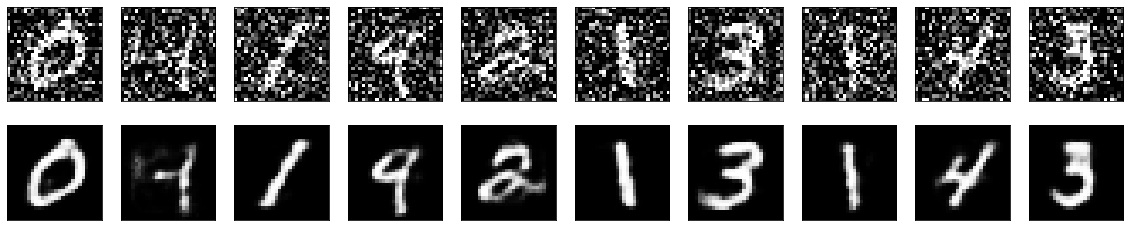

In [7]:
n = 10
plt.figure(figsize = (20, 4))

for i in range(1, n+1):
  ##Displaying original images
  ax = plt.subplot(2, n, i)
  plt.imshow(X_feat_train_noisy[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
  ##Displaying reconstructed images
  ax = plt.subplot(2, n, i + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
def FEATURES(model):
  
  input_ = model.get_layer('inputs').input
  feat1 = model.get_layer('dense1').output
  feat2 = model.get_layer('dense2').output
  feat3 = model.get_layer('dense3').output
  feat = Concatenate(name = 'concat')([feat1, feat2, feat3])
  
  model = Model(inputs = [input_], 
                outputs = [feat])
  return model

In [9]:
_model = FEATURES(autoencoder)

features_train = _model.predict(X_train)
features_test = _model.predict(X_test)

print(features_train.shape, ' training samples shape')
print(features_test.shape, ' test samples shape')

(60000, 3072)  training samples shape
(10000, 3072)  test samples shape


In [0]:
def DNN(features_shape, num_classes, act = 'relu'):
  
  ##Input
  x = Input(name = 'inputs', shape = features_shape, dtype = 'float32')
  o = x
  
  
  ##Encoder / Decoder
  o = Dense(1024, activation = act, name = 'dense1')(o)
  o = Dense(1024, activation = act, name = 'dense2')(o)
  o = Dense(1024, activation = act, name = 'dense3')(o)
  y_pred = Dense(num_classes, activation = 'sigmoid', name = 'pred')(o)
  
  
  ##Print network summary
  Model(inputs = x, outputs = y_pred).summary()
  
  return Model(inputs = x, outputs = y_pred)

In [0]:
input_shape2 = (features_train.shape[1], )
num_classes = 10

y_train_one = np_utils.to_categorical(y_train, num_classes)
y_test_one = np_utils.to_categorical(y_test, num_classes)

In [0]:
batch_size = 128
epochs = 20
model_fname = 'dnn'

callbacks = [ModelCheckpoint(monitor = 'val_acc', 
                             filepath = model_fname + '.hdf5',
                             save_best_only = True,
                             save_weights_only = True,
                             mode = 'min')]

In [13]:
deep = DNN(input_shape2, num_classes)

deep.compile(optimizer = 'adadelta',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

history = deep.fit(features_train, y_train_one,
                   epochs = epochs,
                   batch_size = batch_size,
                   shuffle = True,
                   validation_data = (features_test, y_test_one),
                   callbacks = callbacks)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 3072)              0         
_________________________________________________________________
dense1 (Dense)               (None, 1024)              3146752   
_________________________________________________________________
dense2 (Dense)               (None, 1024)              1049600   
_________________________________________________________________
dense3 (Dense)               (None, 1024)              1049600   
_________________________________________________________________
pred (Dense)                 (None, 10)                10250     
Total params: 5,256,202
Trainable params: 5,256,202
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 141u

In [0]:
## The predicted_classes function outputs the highest 
## probability class according to the trained classifier
## for each input example

deep.load_weights(model_fname + '.hdf5')
predictions = deep.predict(features_test)
predicted_classes = np.argmax(predictions, axis = 1)

In [0]:
## Check which items we got right / wrong

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

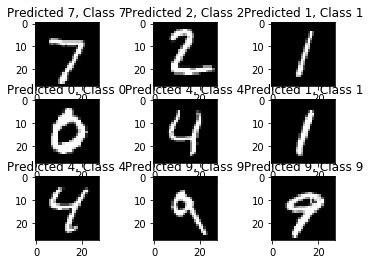

In [16]:
plt.figure()

for i, correct in enumerate(correct_indices[:9]):
  plt.subplot(3, 3, i + 1)
  plt.imshow(X_test[correct].reshape(28, 28),
             cmap = 'gray',
             interpolation = 'none')
  plt.title("Predicted {}, Class {}".format(predicted_classes[correct],
                                            y_test[correct]))

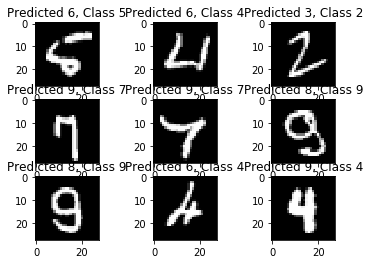

In [17]:
plt.figure()

for i, incorrect in enumerate(incorrect_indices[:9]):
  plt.subplot(3, 3, i + 1)
  plt.imshow(X_test[incorrect].reshape(28, 28),
             cmap = 'gray',
             interpolation = 'none')
  plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect],
                                            y_test[incorrect]))